In [1]:
# Author : Arthur Prigent
# Email : aprigent@geomar.de

In [1]:
from load_librairies import *
import xscale.signal.fitting as xsf
import seaborn as sns
from sklearn import linear_model

def is_jja(month):
    return (month >= 6) & (month <= 8)

def is_amj(month):
    return (month >= 4) & (month <= 6)

def is_mjj(month):
    return (month >= 5) & (month <= 7)

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

In [2]:
BF_obs_1 = [0.58,11.5,0.1] 
BF_obs_2 = [0.37,6.84,0.07] 

# BF1

In [3]:

bf1_hist_cmip6_jja = xr.open_dataset(path_data+'bf1_hist_mjj_CMIP6.nc')
bf1_ssp5_cmip6_jja = xr.open_dataset(path_data+'bf1_ssp5_mjj_CMIP6.nc')

bf1_hist_cmip5_jja = xr.open_dataset(path_data+'bf1_hist_mjj_CMIP5.nc')
bf1_ssp5_cmip5_jja = xr.open_dataset(path_data+'bf1_ssp5_mjj_CMIP5.nc')


# BF2

In [4]:

#
bf2_hist_cmip6_jja = xr.open_dataset(path_data+'bf2_hist_jja_CMIP6_z20.nc')
bf2_ssp5_cmip6_jja = xr.open_dataset(path_data+'bf2_ssp5_jja_CMIP6_z20.nc')

bf2_hist_cmip5_jja = xr.open_dataset(path_data+'bf2_hist_jja_CMIP5_z20.nc')
bf2_ssp5_cmip5_jja = xr.open_dataset(path_data+'bf2_ssp5_jja_CMIP5_z20.nc')



# BF3

In [5]:

bf3_hist_cmip6_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_hist_jja_CMIP6_z20.nc')
bf3_ssp5_cmip6_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_ssp5_jja_CMIP6_z20.nc')


bf3_hist_cmip5_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_hist_jja_CMIP5_z20.nc')
bf3_ssp5_cmip5_jja = xr.open_dataset('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/bf3_ssp5_jja_CMIP5_z20.nc')




In [6]:

bf3_hist_cmip6_jja_new = xr.open_dataset(path_data+'bf3_hist_jja_CMIP6_z20.nc')
bf3_ssp5_cmip6_jja_new = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP6_z20.nc')


bf3_hist_cmip5_jja_new = xr.open_dataset(path_data+'bf3_hist_jja_CMIP5_z20.nc')
bf3_ssp5_cmip5_jja_new = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP5_z20.nc')



# STD ssta / uasa

In [7]:
std_ssta_hist_CMIP5 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP5.nc')
std_ssta_ssp5_CMIP5 = xr.open_dataset(path_data+'std_ssta_ssp5_monthly_CMIP5.nc')


std_uasa_hist_CMIP5 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP5.nc')
std_uasa_ssp5_CMIP5 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP5.nc')

std_ssta_hist_CMIP6 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP6.nc')
std_ssta_ssp5_CMIP6 = xr.open_dataset(path_data+'std_ssta_ssp585_monthly_CMIP6.nc')


std_uasa_hist_CMIP6 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP6.nc')
std_uasa_ssp5_CMIP6 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP6.nc')


# Make the ensemble means 

In [8]:
bf1_hist_cmip6_jja_mean = bf1_hist_cmip6_jja.mean(dim='product')
bf1_ssp5_cmip6_jja_mean = bf1_ssp5_cmip6_jja.mean(dim='product')


bf1_hist_cmip5_jja_mean = bf1_hist_cmip5_jja.mean(dim='product')
bf1_ssp5_cmip5_jja_mean = bf1_ssp5_cmip5_jja.mean(dim='product')


bf2_hist_cmip6_jja_mean = bf2_hist_cmip6_jja.mean(dim='product')
bf2_ssp5_cmip6_jja_mean = bf2_ssp5_cmip6_jja.mean(dim='product')


bf2_hist_cmip5_jja_mean = bf2_hist_cmip5_jja.mean(dim='product')
bf2_ssp5_cmip5_jja_mean = bf2_ssp5_cmip5_jja.mean(dim='product')



bf3_hist_cmip6_jja_mean = bf3_hist_cmip6_jja.mean(dim='product')
bf3_ssp5_cmip6_jja_mean = bf3_ssp5_cmip6_jja.mean(dim='product')


bf3_hist_cmip5_jja_mean = bf3_hist_cmip5_jja.mean(dim='product')
bf3_ssp5_cmip5_jja_mean = bf3_ssp5_cmip5_jja.mean(dim='product')



# Compute the changes between historical and scenario

In [9]:
bf1_changes_cmip6 = bf1_ssp5_cmip6_jja.alpha - bf1_hist_cmip6_jja.alpha
bf2_changes_cmip6 = bf2_ssp5_cmip6_jja.alpha - bf2_hist_cmip6_jja.alpha
bf3_changes_cmip6 = bf3_ssp5_cmip6_jja.alpha - bf3_hist_cmip6_jja.alpha


bf1_changes_cmip5 = bf1_ssp5_cmip5_jja.alpha - bf1_hist_cmip5_jja.alpha
bf2_changes_cmip5 = bf2_ssp5_cmip5_jja.alpha - bf2_hist_cmip5_jja.alpha
bf3_changes_cmip5 = bf3_ssp5_cmip5_jja.alpha - bf3_hist_cmip5_jja.alpha



In [10]:
print(bf2_changes_cmip6[bf2_changes_cmip6<0].shape)
print(bf2_changes_cmip5[bf2_changes_cmip5<0].shape)



(11,)
(15,)


In [11]:
print(bf3_changes_cmip6[bf3_changes_cmip6<0].shape)
print(bf3_changes_cmip5[bf3_changes_cmip5<0].shape)


(12,)
(18,)


In [12]:
std_ssta_hist_CMIP6_jja = std_ssta_hist_CMIP6.sel(month=is_jja(std_ssta_hist_CMIP6['month'])).mean(dim='month')
std_ssta_ssp5_CMIP6_jja = std_ssta_ssp5_CMIP6.sel(month=is_jja(std_ssta_ssp5_CMIP6['month'])).mean(dim='month')


std_ssta_hist_CMIP5_jja = std_ssta_hist_CMIP5.sel(month=is_jja(std_ssta_hist_CMIP5['month'])).mean(dim='month')
std_ssta_ssp5_CMIP5_jja = std_ssta_ssp5_CMIP5.sel(month=is_jja(std_ssta_ssp5_CMIP5['month'])).mean(dim='month')

In [13]:
std_uasa_hist_CMIP6_jja = std_uasa_hist_CMIP6.sel(month=is_jja(std_uasa_hist_CMIP6['month'])).mean(dim='month')
std_uasa_ssp5_CMIP6_jja = std_uasa_ssp5_CMIP6.sel(month=is_jja(std_uasa_ssp5_CMIP6['month'])).mean(dim='month')


std_uasa_hist_CMIP5_jja = std_uasa_hist_CMIP5.sel(month=is_jja(std_uasa_hist_CMIP5['month'])).mean(dim='month')
std_uasa_ssp5_CMIP5_jja = std_uasa_ssp5_CMIP5.sel(month=is_jja(std_uasa_ssp5_CMIP5['month'])).mean(dim='month')


std_uasa_hist_CMIP6_mjj = std_uasa_hist_CMIP6.sel(month=is_mjj(std_uasa_hist_CMIP6['month'])).mean(dim='month')
std_uasa_ssp5_CMIP6_mjj = std_uasa_ssp5_CMIP6.sel(month=is_mjj(std_uasa_ssp5_CMIP6['month'])).mean(dim='month')


std_uasa_hist_CMIP5_mjj = std_uasa_hist_CMIP5.sel(month=is_mjj(std_uasa_hist_CMIP5['month'])).mean(dim='month')
std_uasa_ssp5_CMIP5_mjj = std_uasa_ssp5_CMIP5.sel(month=is_mjj(std_uasa_ssp5_CMIP5['month'])).mean(dim='month')

In [14]:
std_ssta_changes_cmip6 = std_ssta_ssp5_CMIP6_jja.ssta_std - std_ssta_hist_CMIP6_jja.ssta_std
std_ssta_changes_cmip5 = std_ssta_ssp5_CMIP5_jja.ssta_std - std_ssta_hist_CMIP5_jja.ssta_std



In [15]:

std_uasa_changes_cmip5 = std_uasa_ssp5_CMIP5_jja.uasa_std - std_uasa_hist_CMIP5_jja.uasa_std
std_uasa_changes_cmip6 = std_uasa_ssp5_CMIP6_jja.uasa_std - std_uasa_hist_CMIP6_jja.uasa_std



std_uasa_changes_cmip5_mjj = std_uasa_ssp5_CMIP5_mjj.uasa_std - std_uasa_hist_CMIP5_mjj.uasa_std
std_uasa_changes_cmip6_mjj = std_uasa_ssp5_CMIP6_mjj.uasa_std - std_uasa_hist_CMIP6_mjj.uasa_std



In [16]:
combined_bf1_CMIP5_CMIP6 = np.hstack((bf1_changes_cmip5.values,bf1_changes_cmip6.values))
combined_bf2_CMIP5_CMIP6 = np.hstack((bf2_changes_cmip5.values,bf2_changes_cmip6.values))
combined_bf3_CMIP5_CMIP6 = np.hstack((bf3_changes_cmip5.values,bf3_changes_cmip6.values))


combined_ssta_CMIP5_CMIP6 = np.hstack((std_ssta_changes_cmip5.values,std_ssta_changes_cmip6.values))
combined_uasa_CMIP5_CMIP6 = np.hstack((std_uasa_changes_cmip5.values,std_uasa_changes_cmip6.values))

combined_uasa_CMIP5_CMIP6_mjj = np.hstack((std_uasa_changes_cmip5_mjj.values,
                                           std_uasa_changes_cmip6_mjj.values))



# Make regression SSTa changes vs BF changes

In [17]:
#BF1#

alpha0, interp0, r0, p_value0, std0 = stats.linregress(combined_bf1_CMIP5_CMIP6*10,combined_ssta_CMIP5_CMIP6[:])



## Z20 ## 
not_nan_ind_bf2_z20 = ~np.isnan(combined_bf2_CMIP5_CMIP6)
alpha1, interp1, r1, p_value1, std1 = stats.linregress(combined_bf2_CMIP5_CMIP6[not_nan_ind_bf2_z20],
                                                       combined_ssta_CMIP5_CMIP6[not_nan_ind_bf2_z20])

not_nan_ind_bf3_z20 = ~np.isnan(combined_bf3_CMIP5_CMIP6)
alpha2, interp2, r2, p_value2, std2 = stats.linregress(combined_bf3_CMIP5_CMIP6[not_nan_ind_bf3_z20]*100,
                                                       combined_ssta_CMIP5_CMIP6[not_nan_ind_bf3_z20])

alpha2, interp2, r2, p_value2, std2 = stats.linregress(combined_bf3_CMIP5_CMIP6[not_nan_ind_bf3_z20]*100,
                                                       combined_ssta_CMIP5_CMIP6[not_nan_ind_bf3_z20])




In [18]:
p_value0

0.00474528924603492

# Take significant regressions only

In [19]:
index_sign_bf1 = xr.concat([np.logical_and(bf1_hist_cmip5_jja.p_value <= 0.05,
                                             bf1_ssp5_cmip5_jja.p_value <= 0.05),
                              np.logical_and(bf1_hist_cmip6_jja.p_value <= 0.05,
                                             bf1_ssp5_cmip6_jja.p_value <= 0.05)],dim='product')




index_sign_bf2 = xr.concat([np.logical_and(bf2_hist_cmip5_jja.p_value <= 0.05,
                                             bf2_ssp5_cmip5_jja.p_value <= 0.05),
                              np.logical_and(bf2_hist_cmip6_jja.p_value <= 0.05,
                                             bf2_ssp5_cmip6_jja.p_value <= 0.05)],dim='product')




index_sign_bf3 = xr.concat([np.logical_and(bf3_hist_cmip5_jja.p_value <= 0.05,
                                             bf3_ssp5_cmip5_jja.p_value <= 0.05),
                              np.logical_and(bf3_hist_cmip6_jja.p_value <= 0.05,
                                             bf3_ssp5_cmip6_jja.p_value <= 0.05)],dim='product')



In [20]:
## BF1 ##

(alpha0_sign, interp0_sign, r0_sign, p_value0_sign, std0_sign) = stats.linregress(combined_bf1_CMIP5_CMIP6*10,combined_ssta_CMIP5_CMIP6)


alpha1_sign, interp1_sign, r1_sign, p_value1_sign, std1_sign = stats.linregress(
    combined_bf2_CMIP5_CMIP6,combined_ssta_CMIP5_CMIP6)



## BF3 ##

alpha2_sign, interp2_sign, r2_sign, p_value2_sign, std2_sign = stats.linregress(combined_bf3_CMIP5_CMIP6*100,
                                                                                combined_ssta_CMIP5_CMIP6)





In [21]:
x0 = np.arange(-16,17,1)

y0 = alpha0*x0 + interp0


n_replicate = 10000
N = combined_bf1_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf1_CMIP5_CMIP6[ind_resample]*10,
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x0[:, np.newaxis] + result[:, 1]
ci_forecast_bf1_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [22]:
x1 = np.arange(-6,7,1)

y1 = alpha1*x1 + interp1

n_replicate = 10000
N = combined_bf2_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf2_CMIP5_CMIP6[ind_resample],
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x1[:, np.newaxis] + result[:, 1]
ci_forecast_bf2_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [23]:
x2 = np.arange(-12,12,1)
y2 = alpha2*x2 + interp2

n_replicate = 10000
N = combined_bf3_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bf3_CMIP5_CMIP6[ind_resample]*100,
                                   combined_ssta_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x2[:, np.newaxis] + result[:, 1]
ci_forecast_bf3_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

# Z20

Text(0, 1.04, 'f)')

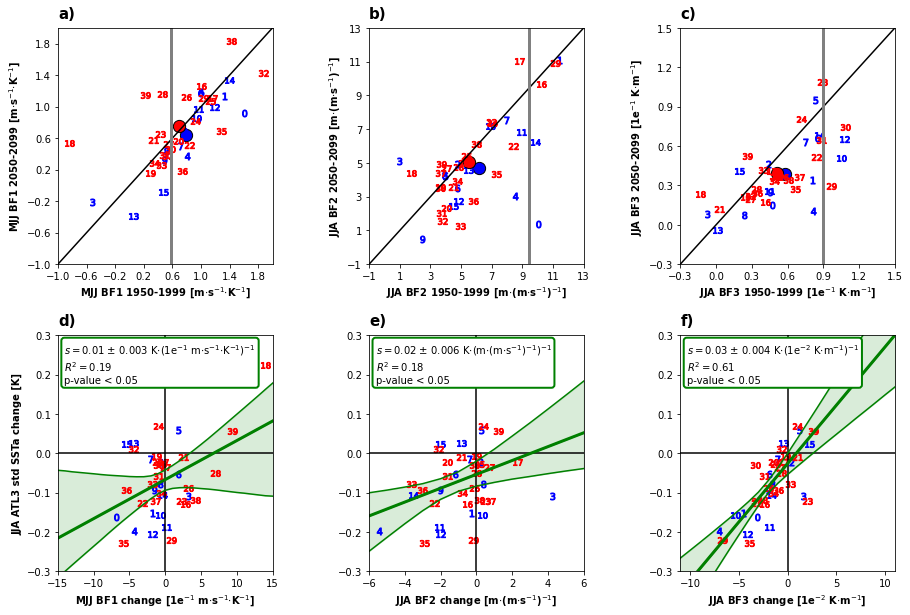

In [24]:
ftz = 15
f,ax = plt.subplots(2,3,figsize=[15,10])
ax=ax.ravel()
color_cmip5 = 'red'
color_cmip6 = 'blue'
m_cmip6 = np.arange(0,bf1_hist_cmip6_jja.alpha.shape[0],1)
m_cmip5 = np.arange(bf1_hist_cmip6_jja.alpha.shape[0],
                    bf1_hist_cmip6_jja.alpha.shape[0] + bf1_hist_cmip5_jja.alpha.shape[0],1)


## FIG a ###

x = np.arange(-1,2.1,0.1)
y = np.arange(-1,2.1,0.1)



ax[0].plot(x,y,color = 'black',label='one-to-one')
ax[0].scatter(bf1_hist_cmip6_jja_mean.alpha,
           bf1_ssp5_cmip6_jja_mean.alpha,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black')




for i in range(bf1_hist_cmip6_jja.alpha.shape[0]):
    if i <10:
        ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                      s=50)

        ax[0].scatter(bf1_hist_cmip6_jja.alpha[i],bf1_ssp5_cmip6_jja.alpha[i],color=color_cmip6,
                          marker=r"$ {} $".format(
                m_cmip6[i]),s=50)

    else:
        ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip6_jja.product[i].values,color=color_cmip6,
                      marker=r"$ {} $".format(m_cmip6[i]),s=100)
        

        ax[0].scatter(bf1_hist_cmip6_jja.alpha[i],bf1_ssp5_cmip6_jja.alpha[i],color=color_cmip6,
                          marker=r"$ {} $".format(m_cmip6[i]),s=100)

        
        
ax[0].scatter(bf1_hist_cmip5_jja_mean.alpha,
           bf1_ssp5_cmip5_jja_mean.alpha,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')  

for k in range(bf1_hist_cmip5_jja.alpha.shape[0]):
    ax[0].scatter(-1000,-1000,
           label=bf1_hist_cmip5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

        
    ax[0].scatter(bf1_hist_cmip5_jja.alpha[k],bf1_ssp5_cmip5_jja.alpha[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

ax[0].axvline(0.58,color='grey',linewidth=3)    
ax[0].set_xlabel('MJJ BF1 1950-1999 [m$\cdot$s$^{-1}$$\cdot$K$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[0].set_ylabel('MJJ BF1 2050-2099 [m$\cdot$s$^{-1}$$\cdot$K$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[0].tick_params(labelsize=ftz-5)

ax[0].set_xlim([-1,2])
ax[0].set_ylim([-1,2])
ax[0].set_xticks(np.arange(-1,2.2,0.4))
ax[0].set_yticks(np.arange(-1,2.2,0.4))
### FIG b ### 

x = np.arange(-2,15,1)
y = np.arange(-2,15,1)
ax[1].plot(x,y,color = 'black',label='one-to-one')
ax[1].scatter(bf2_hist_cmip6_jja_mean.alpha,
           bf2_ssp5_cmip6_jja_mean.alpha,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black')




for i in range(bf1_hist_cmip6_jja.alpha.shape[0]):
    if i <10:

        ax[1].scatter(bf2_hist_cmip6_jja.alpha[i],bf2_ssp5_cmip6_jja.alpha[i],
           label=bf2_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=50)

        
    else:

        ax[1].scatter(bf2_hist_cmip6_jja.alpha[i],bf2_ssp5_cmip6_jja.alpha[i],
           label=bf2_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=100)

        
        
        
ax[1].scatter(bf2_hist_cmip5_jja_mean.alpha,
           bf2_ssp5_cmip5_jja_mean.alpha,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')  


for k in range(bf2_hist_cmip5_jja.alpha.shape[0]):

    ax[1].scatter(bf2_hist_cmip5_jja.alpha[k],bf2_ssp5_cmip5_jja.alpha[k],
           label=bf2_hist_cmip5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

    
ax[1].set_xlabel('JJA BF2 1950-1999 [m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[1].set_ylabel('JJA BF2 2050-2099 [m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[1].tick_params(labelsize=ftz-5)
ax[1].set_xlim([-1,13])
ax[1].set_ylim([-1,13])
ax[1].set_xticks(np.arange(-1,15,2))
ax[1].set_yticks(np.arange(-1,15,2))
ax[1].axvline(9.46,color='grey',linewidth=3)

### FIG c ###



x = np.arange(-0.5,2,0.5)
y = np.arange(-0.5,2,0.5)
ax[2].plot(x,y,color = 'black',label='one-to-one')
ax[2].scatter(bf3_hist_cmip6_jja_mean.alpha*10,
           bf3_ssp5_cmip6_jja_mean.alpha*10,color=color_cmip6,s = 150,
           label='Ens mean CMIP6',edgecolor='black')




for i in range(bf3_hist_cmip6_jja.alpha.shape[0]):
    if i <10:
        ax[2].scatter(bf3_hist_cmip6_jja.alpha[i]*10,bf3_ssp5_cmip6_jja.alpha[i]*10,
           label=bf3_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=50)

        
    else:

        ax[2].scatter(bf3_hist_cmip6_jja.alpha[i]*10,bf3_ssp5_cmip6_jja.alpha[i]*10,
           label=bf3_hist_cmip6_jja.product[i].values,color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),
                          s=100)

        
        
ax[2].scatter(bf3_hist_cmip5_jja_mean.alpha*10,
           bf3_ssp5_cmip5_jja_mean.alpha*10,color=color_cmip5,s = 150,
           label='Ens mean CMIP5',edgecolor='black')    

for k in range(bf3_hist_cmip5_jja.alpha.shape[0]):

    ax[2].scatter(bf3_hist_cmip5_jja.alpha[k]*10,bf3_ssp5_cmip5_jja.alpha[k]*10,
           label=bf3_hist_cmip5_jja.product[k].values,
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

    
ax[2].set_xlabel('JJA BF3 1950-1999 [1e$^{-1}$ K$\cdot$m$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[2].set_ylabel('JJA BF3 2050-2099 [1e$^{-1}$ K$\cdot$m$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[2].tick_params(labelsize=ftz-5)
ax[2].set_xlim([-0.25,1.5])
ax[2].set_ylim([-0.25,1.5])
ax[2].set_xticks(np.arange(-0.3,1.6,0.3))
ax[2].set_yticks(np.arange(-0.3,1.6,0.3))
ax[2].axvline(0.09*10,color='grey',linewidth=3)




m_cmip6 = np.arange(0,bf1_hist_cmip6_jja.alpha.shape[0],1)
m_cmip5 = np.arange(bf1_hist_cmip6_jja.alpha.shape[0],
                    bf1_hist_cmip6_jja.alpha.shape[0] + bf1_hist_cmip5_jja.alpha.shape[0],1)

ax=ax.ravel()

## FIG d ##
ax[3].axhline(0,color='black')
ax[3].axvline(0,color='black')
x0 = np.arange(-16,17,1)
y0 = alpha0*x0 + interp0
#ax[3].plot(x0,y0,'green',alpha=0.25)

y0_sign = alpha0_sign*x0 + interp0_sign
ax[3].plot(x0,y0_sign,'green',alpha=1)

ax[3].plot(x0,y0_sign,color='green',linewidth=3)
ax[3].plot(x0, ci_forecast_bf1_ssta[0], 'green')
ax[3].plot(x0, ci_forecast_bf1_ssta[1], 'green')
ax[3].fill_between(x0,y0_sign,ci_forecast_bf1_ssta[0],color='green',alpha=0.15)
ax[3].fill_between(x0,y0_sign,ci_forecast_bf1_ssta[1],color='green',alpha=0.15)
for i in range(bf1_changes_cmip6.product.shape[0]):
    if i<10:

        ax[3].scatter(bf1_changes_cmip6[i]*10,std_ssta_changes_cmip6[i],
                  label=bf1_changes_cmip6.product.values[i],
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=50)

    else:

        ax[3].scatter(bf1_changes_cmip6[i]*10,std_ssta_changes_cmip6[i],
                  label=bf1_changes_cmip6.product.values[i],
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=100)


for k in range(bf1_changes_cmip5.product.shape[0]):

    ax[3].scatter(bf1_changes_cmip5[k]*10,std_ssta_changes_cmip5[k],
                      label=bf1_changes_cmip5.product.values[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

ax[3].set_ylabel('JJA ATL3 std SSTa change [K]',fontsize=ftz-5,fontweight='bold')
ax[3].set_xlabel('MJJ BF1 change [1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[3].tick_params(labelsize=ftz-5)
ax[3].set_ylim([-0.3,0.3])
ax[3].set_xlim([-15,15])
ax[3].set_yticks(np.arange(-0.3,0.4,0.1))


if p_value0_sign <0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)$^{-1}$' %
                     (alpha0_sign, std0_sign),
                     r'$R^{2}=%.2f$' % (r0_sign**2, ),
                    'p-value < 0.05'))
    
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(1e$^{-1}$ m$\cdot$s$^{-1}$$\cdot$K$^{-1}$)$^{-1}$' %
                     (alpha0_sign, std0_sign),
                     r'$R^{2}=%.2f$' % (r0_sign**2, ),
                    'p-value > 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='green', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[3].text(0.03,
         0.97,
         textstr,
         transform=ax[3].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

## FIG e ## 
ax[4].axhline(0,color='black')
ax[4].axvline(0,color='black')
x1 = np.arange(-6,7,1)
y1 = alpha1*x1 + interp1
#ax[4].plot(x1,y1,'green',alpha=0.25)

y1_sign = alpha1_sign*x1 + interp1_sign
ax[4].plot(x1,y1_sign,'green',alpha=1)

ax[4].plot(x1,y1_sign,color='green',linewidth=3)
ax[4].plot(x1, ci_forecast_bf2_ssta[0], 'green')
ax[4].plot(x1, ci_forecast_bf2_ssta[1], 'green')
ax[4].fill_between(x1,y1_sign,ci_forecast_bf2_ssta[0],color='green',alpha=0.15)
ax[4].fill_between(x1,y1_sign,ci_forecast_bf2_ssta[1],color='green',alpha=0.15)



for i in range(bf2_changes_cmip6.product.shape[0]):
    if i <10:

        ax[4].scatter(bf2_changes_cmip6[i],std_ssta_changes_cmip6[i], 
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=50)

    else:

        ax[4].scatter(bf2_changes_cmip6[i],std_ssta_changes_cmip6[i], 
                  color=color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=100)

    
for k in range(bf2_changes_cmip5.product.shape[0]):

    ax[4].scatter(bf2_changes_cmip5[k],std_ssta_changes_cmip5[k],
                  color=color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

           
ax[4].tick_params(labelsize=ftz-5)
ax[4].set_xlabel('JJA BF2 change [m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[4].set_xlim([-6,6])
ax[4].set_yticks(np.arange(-0.3,0.4,0.1))

if p_value1_sign<0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(m$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$)$^{-1}$' %
                     (alpha1_sign, std1_sign),
                     r'$R^{2}=%.2f$' % (r1_sign**2, ),
                    'p-value < 0.05'))
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$s$^{-1}$' %
                     (alpha1_sign, std1_sign),
                     r'$R^{2}=%.2f$' % (r1_sign**2, ),
                    'p-value > 0.05'))
    
props = dict(boxstyle='round', facecolor='white', ec='green', lw=2)

# place a text box in upper left in axes coords
ax[4].text(0.03,
         0.97,
         textstr,
         transform=ax[4].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

## FIG f ##
ax[5].axhline(0,color='black')
ax[5].axvline(0,color='black')
x2 = np.arange(-12,12,1)
y2 = alpha2*x2+ interp2
ax[5].plot(x2,y2,'red')


y2_sign = alpha2_sign*x2+ interp2_sign
ax[5].plot(x2,y2_sign,'green',alpha=1)
ax[5].plot(x2,y2_sign,color='green',linewidth=3)
ax[5].plot(x2, ci_forecast_bf3_ssta[0], 'green')
ax[5].plot(x2, ci_forecast_bf3_ssta[1], 'green')
ax[5].fill_between(x2,y2_sign,ci_forecast_bf3_ssta[0],color='green',alpha=0.15)
ax[5].fill_between(x2,y2_sign,ci_forecast_bf3_ssta[1],color='green',alpha=0.15)

for i in range(bf3_changes_cmip6.product.shape[0]):
    if i <10:

        ax[5].scatter(bf3_changes_cmip6[i]*100,std_ssta_changes_cmip6[i],
                  color = color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=50)

    else:

        ax[5].scatter(bf3_changes_cmip6[i]*100,std_ssta_changes_cmip6[i],
                  color = color_cmip6,marker=r"$ {} $".format(m_cmip6[i]),s=100)

    
for k in range(bf3_changes_cmip5.product.shape[0]):

    ax[5].scatter(bf3_changes_cmip5[k]*100,std_ssta_changes_cmip5[k],
                  color = color_cmip5,marker=r"$ {} $".format(m_cmip5[k]),s=100)

    
    
ax[5].tick_params(labelsize=ftz-5)
ax[5].set_xlabel('JJA BF3 change [1e$^{-2}$ K$\cdot$m$^{-1}$]',fontsize=ftz-5,fontweight='bold')
ax[5].set_xlim([-11,11])
ax[5].set_ylim([-0.3,0.3])
ax[5].set_yticks(np.arange(-0.3,0.4,0.1))
if p_value2<0.05:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f K$\cdot$(1e$^{-2}$ K$\cdot$m$^{-1}$)$^{-1}$' %
                     (alpha2_sign, std2_sign),
                     r'$R^{2}=%.2f$' % (r2_sign**2, ),
                    'p-value < 0.05'))
else:
    textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.3f m' %
                     (alpha2_sign, std2_sign),
                     r'$R^{2}=%.2f$' % (r2_sign**2, ),
                    'p-value > 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='green', lw=2)

# place a text box in upper left in axes coords
ax[5].text(0.03,
         0.97,
         textstr,
         transform=ax[5].transAxes,
         fontsize=ftz-5,
         verticalalignment='top',
         bbox=props)






plt.subplots_adjust( hspace=0.3,
                    wspace=0.45)
ax[0].text(0,
         1.04, 'a)',transform=ax[0].transAxes,size=ftz,weight='bold')
ax[1].text(0,
         1.04, 'b)',transform=ax[1].transAxes,size=ftz,weight='bold')
ax[2].text(0,
         1.04, 'c)',transform=ax[2].transAxes,size=ftz,weight='bold')


ax[4].text(0,
         1.04, 'd)',transform=ax[3].transAxes,size=ftz,weight='bold')
ax[5].text(0,
         1.04, 'e)',transform=ax[4].transAxes,size=ftz,weight='bold')
ax[5].text(0,
         1.04, 'f)',transform=ax[5].transAxes,size=ftz,weight='bold')

#plt.savefig(path_fig + 'figure_02.pdf',
#             dpi = 300,
#            bbox_inches='tight')